## What are the factors that cause landslides?

We use a dataset from the Kaggle platform:
    [Landslide Risk Assessment Factors](https://www.kaggle.com/datasets/mohammadrahdanmofrad/landslide-risk-assessment-factors)

In [1]:
!mkdir -p data
!curl -L -o ./landslides-risk-assessment-factors.zip \
    https://www.kaggle.com/api/v1/datasets/download/mohammadrahdanmofrad/landslide-risk-assessment-factors
!unzip -n ./landslides-risk-assessment-factors.zip -d ./data
!rm ./landslides-risk-assessment-factors.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  183k  100  183k    0     0   133k      0  0:00:01  0:00:01 --:--:--  813k
Archive:  ./landslides-risk-assessment-factors.zip
  inflating: ./data/Landslide_Factors_IRAN.csv  


In [ ]:
!pip install -r requirements.txt

In [2]:
import pandas as pd

In [3]:
landslide_factors_df = pd.read_csv('./data/Landslide_Factors_IRAN.csv')

In [4]:
landslide_factors_df.shape

(4295, 15)

In [5]:
landslide_factors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4295 entries, 0 to 4294
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               4295 non-null   int64  
 1   LONG             4295 non-null   float64
 2   LAT              4295 non-null   float64
 3   SUB_Basin        4295 non-null   object 
 4   Elevation        4295 non-null   float64
 5   AAP(mm)          4295 non-null   int64  
 6   RiverDIST(m)     4295 non-null   float64
 7   FaultDIST(m)     4295 non-null   float64
 8   Landuse_Type     4295 non-null   object 
 9   Slop(Percent)    4295 non-null   float64
 10  Slop(Degrees)    4295 non-null   float64
 11  GEO_UNIT         4295 non-null   object 
 12  DES_GEOUNI       4295 non-null   object 
 13  Climate_Type     4295 non-null   object 
 14  DES_ClimateType  4295 non-null   object 
dtypes: float64(7), int64(2), object(6)
memory usage: 503.4+ KB


In [6]:
landslide_factors_df.head()

,ID,LONG,LAT,SUB_Basin,Elevation,AAP(mm),RiverDIST(m),FaultDIST(m),Landuse_Type,Slop(Percent),Slop(Degrees),GEO_UNIT,DES_GEOUNI,Climate_Type,DES_ClimateType
0,1,52.326,27.763,Mehran,617.0,137,1448.705292,40639.57890,poorrange,42.240669,22.899523,EOas-ja,"Undivided Asmari and Jahrum Formation , regard...",A-M-VW,"Warm and humid, with a humid period longer tha..."
1,2,52.333,27.772,Mehran,944.0,137,344.299484,40135.02913,mix(woodland_x),68.219116,34.301464,KEpd-gu,Keewatin Epedotic quartz diorite,A-M-VW,"Warm and humid, with a humid period longer tha..."
2,3,52.326,27.763,Mehran,617.0,137,1448.705292,40639.57890,poorrange,42.240669,22.899523,EOas-ja,"Undivided Asmari and Jahrum Formation , regard...",A-M-VW,"Warm and humid, with a humid period longer tha..."
3,4,52.333,27.694,Mehran,55.0,137,1889.828623,42189.54442,rock,12.141766,6.922833,Mlmmi,Low weathering grey marls alternating with ba...,A-M-VW,"Warm and humid, with a humid period longer tha..."
4,5,52.324,27.682,Mehran,20.0,137,874.201691,43010.08400,poorrange,2.216230,1.269598,MuPlaj,"Brown to grey , calcareous , feature - formin...",A-M-VW,"Warm and humid, with a humid period longer tha..."


In [7]:
landslide_factors_df.isna().sum()

ID                 0
LONG               0
LAT                0
SUB_Basin          0
Elevation          0
AAP(mm)            0
RiverDIST(m)       0
FaultDIST(m)       0
Landuse_Type       0
Slop(Percent)      0
Slop(Degrees)      0
GEO_UNIT           0
DES_GEOUNI         0
Climate_Type       0
DES_ClimateType    0
dtype: int64

In [8]:
landslide_factors_df.duplicated().sum()

np.int64(0)

In [9]:
landslide_factors_df.iloc[:,3:].describe()

,Elevation,AAP(mm),RiverDIST(m),FaultDIST(m),Slop(Percent),Slop(Degrees)
count,4295.000000,4295.000000,4295.000000,4295.000000,4295.000000,4295.000000
mean,1391.111692,242.166007,809.247705,5464.176909,23.083628,12.684708
std,673.859458,136.964710,974.939030,5920.570823,15.483778,7.976655
min,0.000000,54.000000,0.065920,1.121601,0.000000,0.000000
25%,860.500000,158.000000,208.199375,1314.589467,11.533882,6.579355
50%,1552.000000,194.000000,526.187336,3486.626632,20.419369,11.540784
75%,1902.500000,270.000000,1116.083961,7701.447471,31.399784,17.432177
max,3583.000000,1142.000000,25656.226180,44108.087060,100.000000,45.000000


In [10]:
landslide_factors_df.describe(include=[object])

,SUB_Basin,Landuse_Type,GEO_UNIT,DES_GEOUNI,Climate_Type,DES_ClimateType
count,4295,4295,4295,4295,4295,4295
unique,65,37,217,204,15,5
top,Karun,modrange,Qft2,Low level piedmont fan and valley teraces dep...,SA-K-W,"Hot and dry, with a dry period longer than the..."
freq,593,602,331,331,1492,3622


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd

<Axes: xlabel='Elevation', ylabel='Density'>

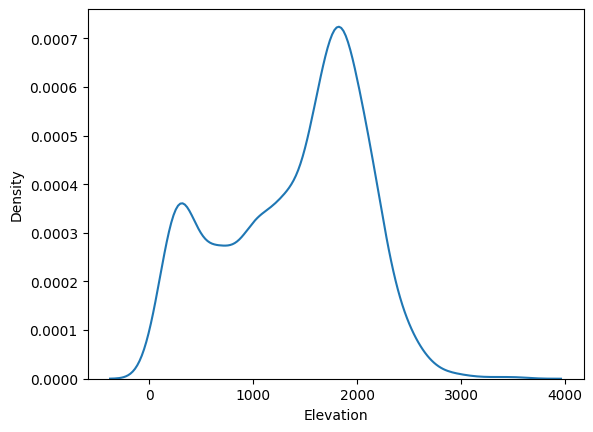

In [12]:
sns.kdeplot(landslide_factors_df, x="Elevation")

<Axes: xlabel='FaultDIST(m)', ylabel='Density'>

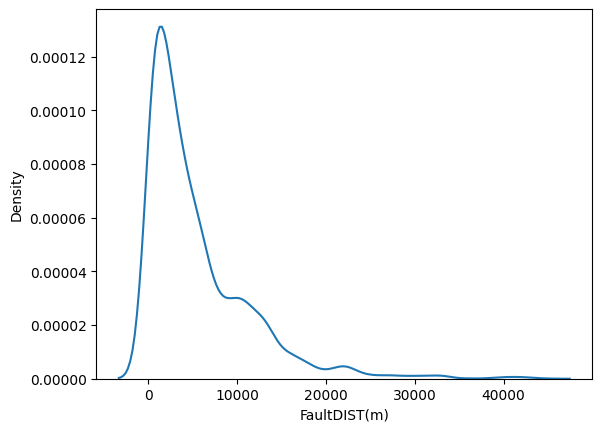

In [13]:
sns.kdeplot(landslide_factors_df, x='FaultDIST(m)')

In [14]:
coordinate = gpd.points_from_xy(landslide_factors_df.LONG, landslide_factors_df.LAT)
landslide_factors_geometry = gpd.GeoDataFrame(landslide_factors_df, crs='EPSG:4326', geometry=coordinate)

<Axes: >

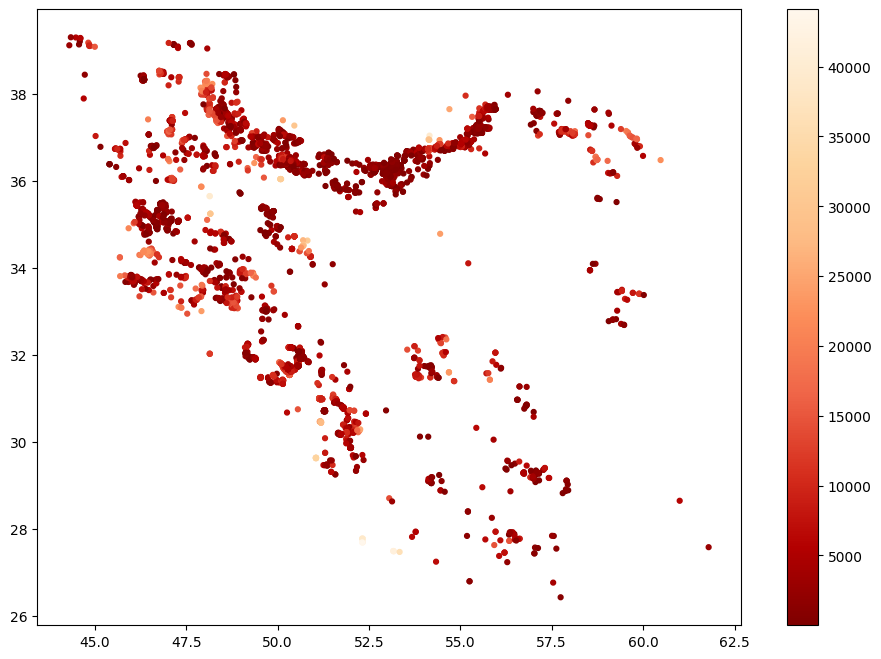

In [15]:
landslide_factors_geometry.plot('FaultDIST(m)', figsize=(12, 8), markersize=12, legend=True, cmap='OrRd_r')